In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats



**Questions** **1. Data Cleaning and Preprocessing (for dataset A)**

In [87]:
#Load the dataset
DataA = pd.read_csv('DataA.csv',encoding='latin-1')
DataA.head()


,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [88]:
print(DataA.columns)


Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9', 'fea.10', 'fea.11', 'fea.12', 'fea.13',
       'fea.14', 'fea.15', 'fea.16', 'fea.17', 'fea.18', 'fea.19', 'fea.20',
       'fea.21', 'fea.22', 'fea.23', 'fea.24', 'fea.25', 'fea.26', 'fea.27',
       'fea.28', 'fea.29', 'fea.30', 'fea.31', 'fea.32', 'fea.33', 'fea.34',
       'fea.35', 'fea.36', 'fea.37', 'fea.38', 'fea.39', 'fea.40', 'fea.41',
       'fea.42', 'fea.43', 'fea.44', 'fea.45', 'fea.46', 'fea.47', 'fea.48',
       'fea.49', 'fea.50', 'fea.51', 'fea.52', 'fea.53', 'fea.54', 'fea.55',
       'fea.56', 'fea.57', 'fea.58', 'fea.59', 'fea.60', 'fea.61', 'fea.62',
       'fea.63', 'fea.64', 'fea.65', 'fea.66', 'fea.67', 'fea.68', 'fea.69',
       'fea.70', 'fea.71', 'fea.72', 'fea.73', 'fea.74', 'fea.75', 'fea.76',
       'fea.77', 'fea.78', 'fea.79', 'fea.80', 'fea.81'],
      dtype='object')


In [89]:
DataA.shape

(19000, 82)

In [90]:
DataA.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [91]:
# # Drop the 'Unnamed: 0' column
# DataA = DataA.drop('Unnamed: 0', axis=1, inplace=True)

# Drop the 'Unnamed: 0' column
DataA = DataA.drop('Unnamed: 0', axis=1)

# Reset the index
DataA = DataA.reset_index(drop=True)


In [92]:
DataA.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


In [93]:
DataA.shape

(19000, 81)

In [94]:
print(DataA.columns)

Index(['fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6', 'fea.7', 'fea.8',
       'fea.9', 'fea.10', 'fea.11', 'fea.12', 'fea.13', 'fea.14', 'fea.15',
       'fea.16', 'fea.17', 'fea.18', 'fea.19', 'fea.20', 'fea.21', 'fea.22',
       'fea.23', 'fea.24', 'fea.25', 'fea.26', 'fea.27', 'fea.28', 'fea.29',
       'fea.30', 'fea.31', 'fea.32', 'fea.33', 'fea.34', 'fea.35', 'fea.36',
       'fea.37', 'fea.38', 'fea.39', 'fea.40', 'fea.41', 'fea.42', 'fea.43',
       'fea.44', 'fea.45', 'fea.46', 'fea.47', 'fea.48', 'fea.49', 'fea.50',
       'fea.51', 'fea.52', 'fea.53', 'fea.54', 'fea.55', 'fea.56', 'fea.57',
       'fea.58', 'fea.59', 'fea.60', 'fea.61', 'fea.62', 'fea.63', 'fea.64',
       'fea.65', 'fea.66', 'fea.67', 'fea.68', 'fea.69', 'fea.70', 'fea.71',
       'fea.72', 'fea.73', 'fea.74', 'fea.75', 'fea.76', 'fea.77', 'fea.78',
       'fea.79', 'fea.80', 'fea.81'],
      dtype='object')


In [95]:
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   17813 non-null  float64
 1   fea.2   17812 non-null  float64
 2   fea.3   17813 non-null  float64
 3   fea.4   18200 non-null  float64
 4   fea.5   18200 non-null  float64
 5   fea.6   18200 non-null  float64
 6   fea.7   18099 non-null  float64
 7   fea.8   18099 non-null  float64
 8   fea.9   18099 non-null  float64
 9   fea.10  18043 non-null  float64
 10  fea.11  18044 non-null  float64
 11  fea.12  18044 non-null  float64
 12  fea.13  17950 non-null  float64
 13  fea.14  17950 non-null  float64
 14  fea.15  17950 non-null  float64
 15  fea.16  18202 non-null  float64
 16  fea.17  18202 non-null  float64
 17  fea.18  18202 non-null  float64
 18  fea.19  17964 non-null  float64
 19  fea.20  17964 non-null  float64
 20  fea.21  17964 non-null  float64
 21  fea.22  17677 non-null  float64
 22

In [96]:
DataA.isnull().sum()

fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64

In [97]:
DataA.tail(775)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
18225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-156.0,-611.0,75.0,772.0,-1007.0,-26.0,12.0,-48.0,-6.0,43.0
18226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-157.0,-611.0,74.0,772.0,-1005.0,-26.0,16.0,-33.0,-1.0,39.0
18227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df_na = DataA.any(skipna=True, axis=1)
df_na[df_na==False].shape[0]

773

In [99]:
DataA.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,17813.000000,17812.000000,17813.000000,18200.000000,18200.000000,18200.000000,18099.000000,18099.000000,18099.000000,18043.000000,...,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,...,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,284.183187,375.672475,396.654659,183.151634,193.963300,254.001018,317.393784,196.829252,327.904371,343.131382,...,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,...,-953.000000,-853.000000,-771.000000,-984.000000,-2562.000000,-5424.000000,-3133.000000,-7189.000000,-5861.000000,-3051.000000
25%,-179.000000,360.000000,304.000000,-409.000000,860.000000,-144.000000,-131.000000,854.000000,-155.000000,158.000000,...,-487.000000,-323.000000,-173.000000,29.000000,-983.000000,-276.000000,31.000000,-246.500000,-118.000000,-115.000000
50%,-100.000000,811.000000,574.000000,-266.000000,969.500000,-39.000000,70.000000,946.000000,41.000000,380.000000,...,-223.000000,32.000000,251.000000,698.000000,-940.000000,0.000000,132.000000,-29.000000,4.000000,19.000000
75%,-15.000000,984.000000,955.000000,-167.000000,1006.000000,45.000000,251.000000,997.000000,315.000000,583.000000,...,174.000000,179.000000,413.000000,823.000000,-840.000000,225.000000,276.000000,195.000000,115.000000,169.000000
max,1887.000000,2531.000000,2941.000000,609.000000,1833.000000,1215.000000,1490.000000,1682.000000,1096.000000,2202.000000,...,949.000000,775.000000,759.000000,999.000000,613.000000,4877.000000,3742.000000,7497.000000,8675.000000,5821.000000


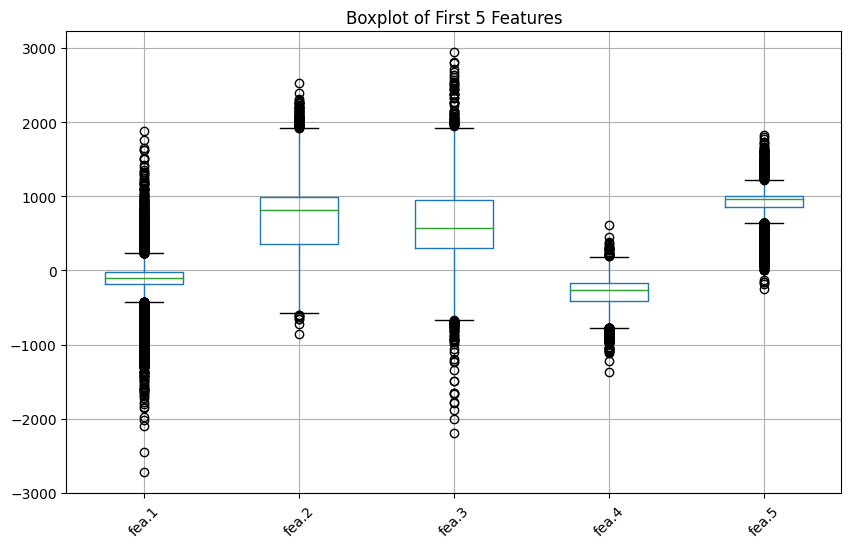

In [100]:
# Select the first 5 features
first_5_features = DataA.iloc[:, :5]

# Create box plots for the first 5 features
first_5_features.boxplot(figsize=(10, 6))
plt.title('Boxplot of First 5 Features')
plt.xticks(rotation=45)
plt.show()

**1. Detect any problems that need to be fixed in dataset A. Report such problems.**


Based on the analysis of dataset A, the following problems were identified:

i. Feature 34, 35, and 36 columns have only 1 non-null value.
**bold text**

*   This suggests that these columns may not contain sufficient information to be meaningful for analysis.
*   These columns could be candidates for removal from the dataset



**ii. The last 773 rows of the data set values are missing 18,227 to 18,999.**


*   It seems there is a significant chunk of missing data in the last portion of the dataset.

**iii. Missing values or Null values present in the data set.**


*    Identify the presence of missing or null values in the dataset




**iv. Outliers present in the data.**


*    Perform outlier detection to identify extreme values in the dataset using box plots that might adversely affect analysis or modeling.








**2. Fix the detected problems using some of the methods discussed in class.**

**i. Feature 34, 35, and 36 columns have only 1 non-null value.**

**Solution:**
Since these columns have only one non-null value, they are unlikely to contribute meaningful information to our analysis. Therefore, dropping them is a reasonable solution. This can be done using the drop method.

**ii. The last 773 rows of the data set values are missing 18,227 to 18,999**

**Solution:** As these last 773 rows contain incomplete data and may not contribute meaningfully to the analysis, consider dropping these rows.
By dropping these rows, we ensure that this dataset is more consistent and reliable for further analysis or modeling.

**iii. Missing values or Null values present in the data set.**

**Solution:**
Used DataA.fillna(DataA.median(), inplace=True) to replace missing values with the median of each column.


**iv. Outliers present in the data.**

**Solution:**
In the dataset, the Interquartile Range (IQR) method is being utilized to detect and smooth outliers using a custom function. Through iteration over each numerical column, extreme values beyond a specified IQR range are replaced with the nearest boundary.

In [101]:
DataA.shape

(19000, 81)

In [102]:
# Remove columns 'fea.34', 'fea.35', and 'fea.36' from the DataFrame DataA
DataA=DataA.drop(columns=['fea.34','fea.35','fea.36'])
# Display information about the DataFrame to show the non-null values present in each column
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   17813 non-null  float64
 1   fea.2   17812 non-null  float64
 2   fea.3   17813 non-null  float64
 3   fea.4   18200 non-null  float64
 4   fea.5   18200 non-null  float64
 5   fea.6   18200 non-null  float64
 6   fea.7   18099 non-null  float64
 7   fea.8   18099 non-null  float64
 8   fea.9   18099 non-null  float64
 9   fea.10  18043 non-null  float64
 10  fea.11  18044 non-null  float64
 11  fea.12  18044 non-null  float64
 12  fea.13  17950 non-null  float64
 13  fea.14  17950 non-null  float64
 14  fea.15  17950 non-null  float64
 15  fea.16  18202 non-null  float64
 16  fea.17  18202 non-null  float64
 17  fea.18  18202 non-null  float64
 18  fea.19  17964 non-null  float64
 19  fea.20  17964 non-null  float64
 20  fea.21  17964 non-null  float64
 21  fea.22  17677 non-null  float64
 22

In [103]:
# Drop the last 773 rows
DataA = DataA.iloc[:-773]
DataA.shape

(18227, 78)

In [104]:
# Fill null values with median
DataA.fillna(DataA.median(), inplace=True)
DataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fea.1   18227 non-null  float64
 1   fea.2   18227 non-null  float64
 2   fea.3   18227 non-null  float64
 3   fea.4   18227 non-null  float64
 4   fea.5   18227 non-null  float64
 5   fea.6   18227 non-null  float64
 6   fea.7   18227 non-null  float64
 7   fea.8   18227 non-null  float64
 8   fea.9   18227 non-null  float64
 9   fea.10  18227 non-null  float64
 10  fea.11  18227 non-null  float64
 11  fea.12  18227 non-null  float64
 12  fea.13  18227 non-null  float64
 13  fea.14  18227 non-null  float64
 14  fea.15  18227 non-null  float64
 15  fea.16  18227 non-null  float64
 16  fea.17  18227 non-null  float64
 17  fea.18  18227 non-null  float64
 18  fea.19  18227 non-null  float64
 19  fea.20  18227 non-null  float64
 20  fea.21  18227 non-null  float64
 21  fea.22  18227 non-null  float64
 22

In [105]:
# Function to smooth outliers using IQR
def smooth_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

# Apply the function to each numerical column in the DataFrame
numerical_columns = DataA.select_dtypes(include='number').columns
for column in numerical_columns:
    DataA[column] = smooth_outliers_iqr(DataA[column])

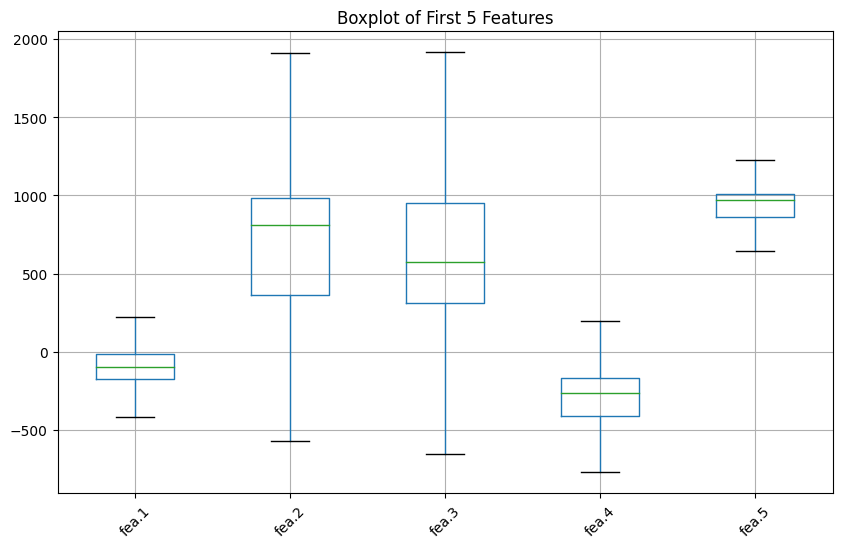

In [106]:
# Select the first 5 features
first_5_features = DataA.iloc[:, :5]

# Create box plots for the first 5 features
first_5_features.boxplot(figsize=(10, 6))
plt.title('Boxplot of First 5 Features')
plt.xticks(rotation=45)
plt.show()

**3. Normalize the data using min-max and z-score normalizaAon. Plot histograms of feature
9 and 24; compare and comment on the differences before and aHer normalizaAon.**




In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

# Extract features 9 and 24
feature_9 = DataA['fea.9']
feature_24 = DataA['fea.24']

# Initialize MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-max normalization
feature_9_minmax = min_max_scaler.fit_transform(feature_9.values.reshape(-1, 1))
feature_24_minmax = min_max_scaler.fit_transform(feature_24.values.reshape(-1, 1))

# Z-score normalization
feature_9_zscore = standard_scaler.fit_transform(feature_9.values.reshape(-1, 1))
feature_24_zscore = standard_scaler.fit_transform(feature_24.values.reshape(-1, 1))

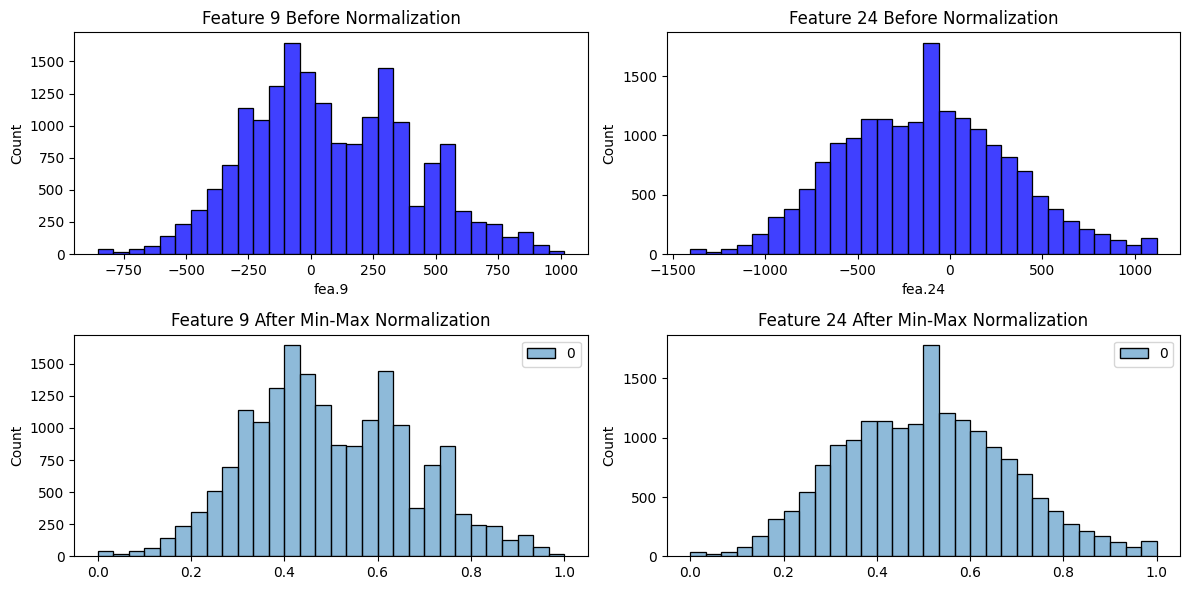

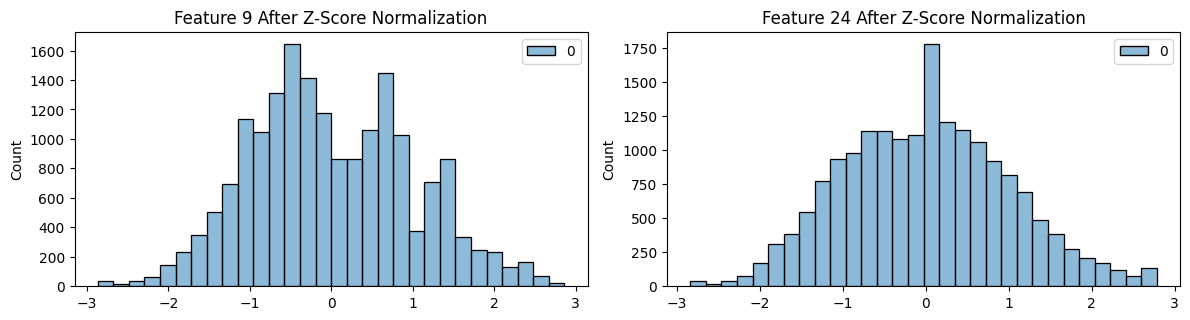

In [108]:
# Plot histograms before and after normalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(feature_9, bins=30, color='blue')
plt.title('Feature 9 Before Normalization')

plt.subplot(2, 2, 2)
sns.histplot(feature_24, bins=30, color='blue')
plt.title('Feature 24 Before Normalization')

plt.subplot(2, 2, 3)
sns.histplot(feature_9_minmax, bins=30, color='green')
plt.title('Feature 9 After Min-Max Normalization')

plt.subplot(2, 2, 4)
sns.histplot(feature_24_minmax, bins=30, color='green')
plt.title('Feature 24 After Min-Max Normalization')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(feature_9_zscore, bins=30, color='red')
plt.title('Feature 9 After Z-Score Normalization')

plt.subplot(2, 2, 2)
sns.histplot(feature_24_zscore, bins=30, color='red')
plt.title('Feature 24 After Z-Score Normalization')

plt.tight_layout()
plt.show()

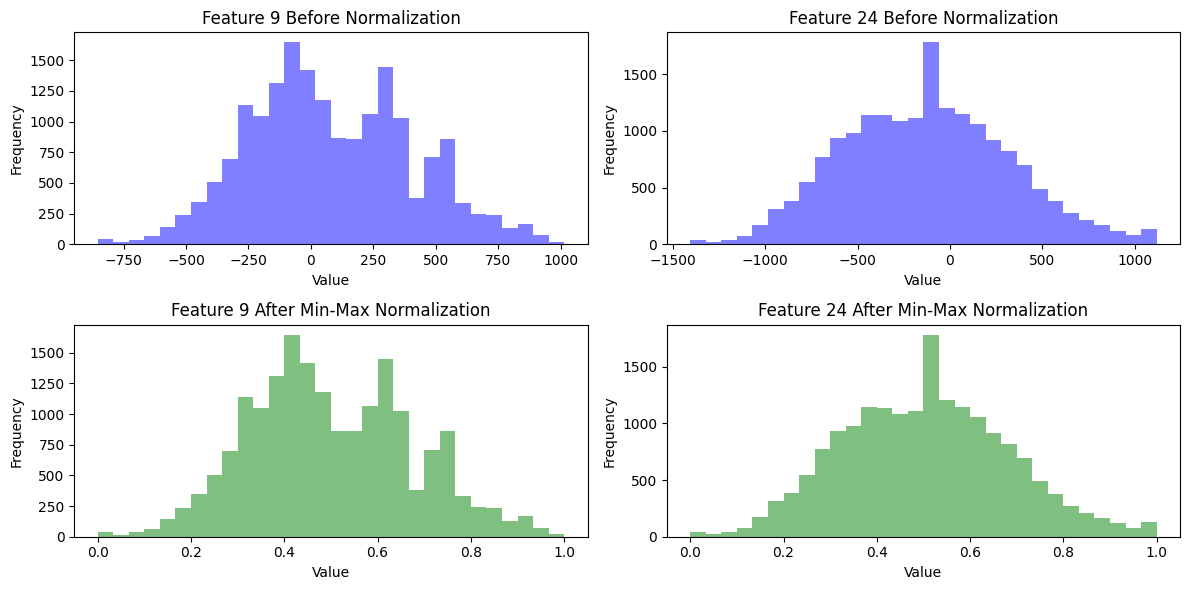

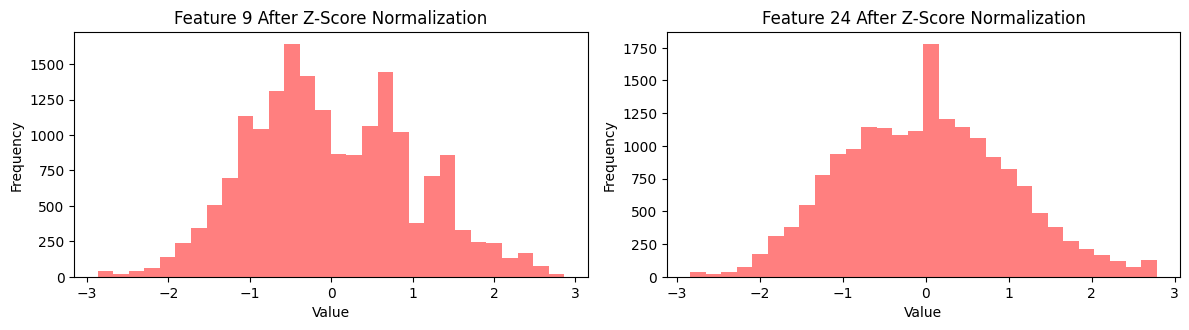

In [109]:
# Plot histograms before and after normalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(feature_9, bins=30, color='blue', alpha=0.5)
plt.title('Feature 9 Before Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(feature_24, bins=30, color='blue', alpha=0.5)
plt.title('Feature 24 Before Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(feature_9_minmax, bins=30, color='green', alpha=0.5)
plt.title('Feature 9 After Min-Max Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(feature_24_minmax, bins=30, color='green', alpha=0.5)
plt.title('Feature 24 After Min-Max Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(feature_9_zscore, bins=30, color='red', alpha=0.5)
plt.title('Feature 9 After Z-Score Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(feature_24_zscore, bins=30, color='red', alpha=0.5)
plt.title('Feature 24 After Z-Score Normalization')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Data normalization using min-max and z-score methods was conducted, followed by a comparison of histograms for features 9 and 24 before and after normalization.